In [ ]:
#PROJECT

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:


# Set seed for reproducible results
np.random.seed(42)

# Create data directly (no function)
data = []
for i in range(1, 201):
    data.append({
        'order_id': f'ORD{i:03d}',
        'product': np.random.choice(['Laptop', 'Phone', 'Tablet', 'Headphones', 'Watch']),
        'category': np.random.choice(['Electronics', 'Accessories']),
        'price': np.random.randint(100, 1000),
        'quantity': np.random.randint(1, 5),
        'month': np.random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']),
        'region': np.random.choice(['North', 'South', 'East', 'West'])
    })

df = pd.DataFrame(data)
df['total_sales'] = df['price'] * df['quantity']
print(f"Dataset created: {len(df)} records")

Dataset created: 200 records


In [22]:
print("\n DATA OVERVIEW")
print("-" * 20)
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nBasic statistics:")
print(df[['price', 'quantity', 'total_sales']].describe())



 DATA OVERVIEW
--------------------
Dataset shape: (200, 8)

First 5 rows:
  order_id     product     category  price  quantity month region  total_sales
0   ORD001  Headphones  Electronics    370         3   May  North         1110
1   ORD002       Phone  Electronics    314         3   Mar   West          942
2   ORD003       Watch  Accessories    971         4   Mar  South         3884
3   ORD004       Watch  Accessories    443         4   Jun  South         1772
4   ORD005       Phone  Accessories    376         1   Apr  South          376

Basic statistics:
           price    quantity  total_sales
count  200.00000  200.000000   200.000000
mean   553.31000    2.525000  1403.805000
std    277.55261    1.097908   991.600719
min    100.00000    1.000000   107.000000
25%    294.00000    2.000000   660.000000
50%    556.50000    3.000000  1086.000000
75%    797.25000    3.000000  1977.750000
max    999.00000    4.000000  3996.000000


In [24]:
print("\n💡 KEY INSIGHTS")
print("-" * 15)

# Total sales
total_revenue = df['total_sales'].sum()
print(f"Total Revenue: $(total_revenue:,)")

# Best selling product
best_product = df.groupby('product')['total_sales'].sum().idxmax()

print(f"Best Product: (best_product)")

# Top region
top_region = df.groupby('region')['total_sales'].sum().idxmax()
print(f"Top Region: (top_region)")

# Average order value
avg_order = df['total_sales'].mean()
print(f"Average Order: $(avg_order:.2f)")


💡 KEY INSIGHTS
---------------
Total Revenue: $(total_revenue:,)
Best Product: (best_product)
Top Region: (top_region)
Average Order: $(avg_order:.2f)


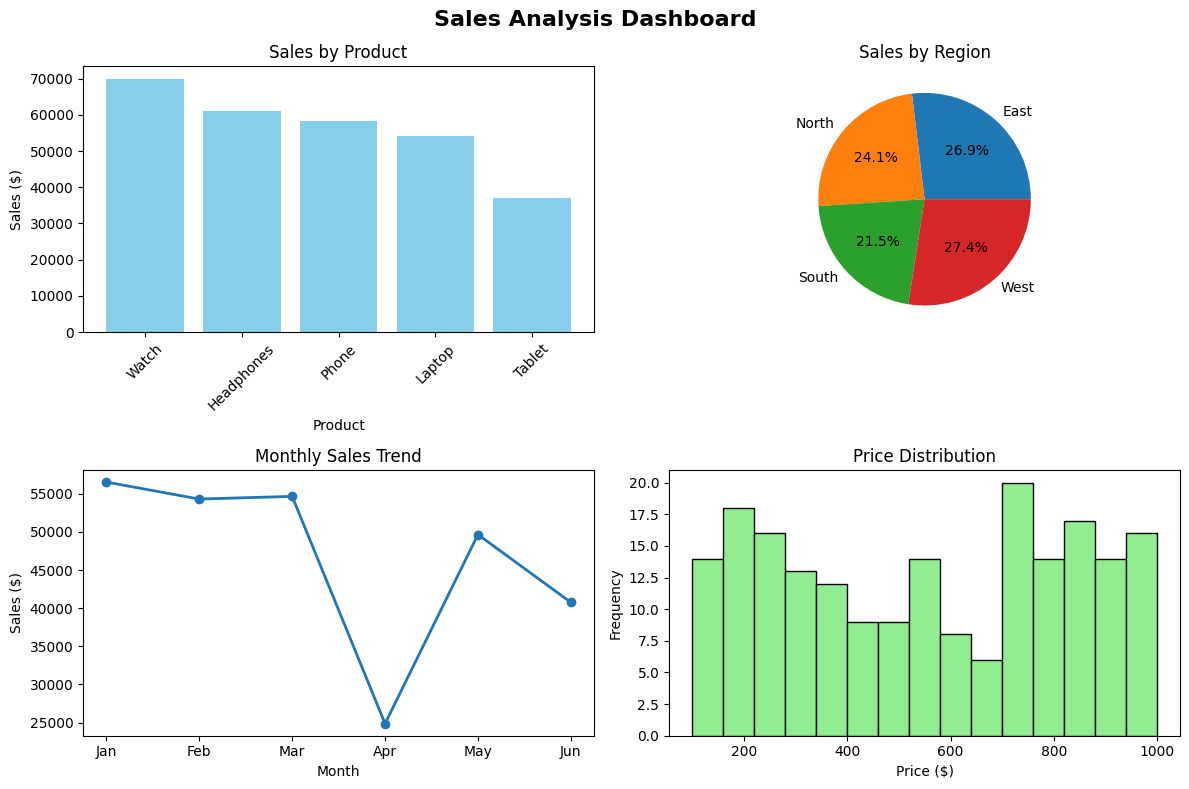

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Sales by Product
product_sales = df.groupby('product')['total_sales'].sum().sort_values(ascending=False)
axes[0,0].bar(product_sales.index, product_sales.values, color='skyblue')
axes[0,0].set_title('Sales by Product')
axes[0,0].set_xlabel('Product')
axes[0,0].set_ylabel('Sales ($)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Sales by Region
region_sales = df.groupby('region')['total_sales'].sum()
axes[0,1].pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%')
axes[0,1].set_title('Sales by Region')

# 3. Monthly Sales Trend
monthly_sales = df.groupby('month')['total_sales'].sum()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
monthly_ordered = monthly_sales.reindex(month_order)
axes[1,0].plot(monthly_ordered.index, monthly_ordered.values, marker='o', linewidth=2)
axes[1,0].set_title('Monthly Sales Trend')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Sales ($)')

# 4. Price Distribution
axes[1,1].hist(df['price'], bins=15, color='lightgreen', edgecolor='black')
axes[1,1].set_title('Price Distribution')
axes[1,1].set_xlabel('Price ($)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('simple_sales_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
print("\n📋 DETAILED ANALYSIS")
print("-" * 20)

# Sales summary by product
print("Sales by Product:")
product_summary = df.groupby('product').agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'order_id': 'count'
}).round(2)
product_summary.columns = ['Total_Sales', 'Total_Quantity', 'Total_Orders']
print(product_summary.sort_values('Total_Sales', ascending=False))

print("\nSales by Region:")
region_summary = df.groupby('region')['total_sales'].sum().sort_values(ascending=False)
print(region_summary)



📋 DETAILED ANALYSIS
--------------------
Sales by Product:
            Total_Sales  Total_Quantity  Total_Orders
product                                              
Watch             69912             112            45
Headphones        61171             123            45
Phone             58369              93            40
Laptop            54193              97            38
Tablet            37116              80            32

Sales by Region:
region
West     77060
East     75511
North    67769
South    60421
Name: total_sales, dtype: int64


In [33]:
print("\n📈 QUICK BUSINESS INSIGHTS:")
print(f"1. {best_product} is the top-selling product")
print(f"2. {top_region} region performs the best")
print(f"3. Average order value is ${avg_order:.2f}")
print(f"4. Total revenue generated: ${total_revenue:,}")


📈 QUICK BUSINESS INSIGHTS:
1. Watch is the top-selling product
2. West region performs the best
3. Average order value is $1403.81
4. Total revenue generated: $280,761
